# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)



## Introduction: Business Problem <a name="introduction"></a>

New York City's demographics show that it is a large and ethnically diverse metropolis. It is the largest city in the United States with a long history of international immigration. New York City was home to nearly 8.3 million people in 2019, accounting for over 40% of the population of New York State and a slightly lower percentage of the New York metropolitan area, home to approximately 23.6 million. Over the last decade, the city has been growing faster than the region. The New York region continues to be by far the leading metropolitan gateway for legal immigrants admitted into the United States. 
This final project explores some optimized locations for Japanese restaurants throughout the city of New York. Potentially the owner of the new Japanese restaurant can have great success and consistent profit. However, as with any business, opening a new restaurant requires serious considerations and is more complicated than it seems from the first glance. In particular, the location of the restaurant is one of the most important factors that will affect whether it will have success or a failure. So, our project will attempt to answer the questions “Where should a financier open a Japanese Restaurant?” and “Where should we go If we want to have a great Japanese food?” 
The objective of this project is to gathering data, analyze and find the optimized locations in the city of New York to establish a new Japanese restaurant. Using Data Science methodologies and instructions such as Data Analysis and Visualization, this project aims us to provide solutions in order to answer the business question: Where is an optimized location in the New York City, that a financier should open a Japanese Restaurant? 

## Data <a name="data"></a>

In order to run the project, we will need the following data: 
* New York City data containing the neighborhoods and boroughs
* Latitude and longitude coordinates of those neighborhoods. This is required to plot the map and get the venue data
* Venue data, particularly data related to restaurants. We are going to use this data to perform further analysis of the neighborhoods\
\
New York City data containing the neighborhoods and boroughs will be obtained from the open data source: https://cocl.us/new_york_dataset . After it, we will get the geographical coordinates of the neighborhoods (latitude and longitude) using Python Geocoder package. 
Finally, we will use Foursquare API to get the venue data for the neighborhoods defined at the previous step. Foursquare has one of the largest databases of 105+ million places and over 125,000 developers use this application. Foursquare API provides many categories of the venue data; we are particularly interested in the restaurant data to solve the business problem defined above. 
We will use some data science skills such as web scrapping (open source dataset), working with API (Foursquare), data cleaning, data wrangling, visualization (Folium). 



### Methodology

* Data will be collected from https://cocl.us/new_york_dataset and cleaned and processed into a dataframe.

* FourSquare be used to locate all venues and then filtered by Japanese restaurants. Ratings, tips, and likes by users will be counted and added to the dataframe.

* Data will be sorted based on rankings.

* Finally, the data be will be visually assessed using graphing from Python libraries.

### Now,let's import all required libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests # library to handle requests

#from bs4 import BeautifulSoup
import os

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

import seaborn as sns

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    ------------------------------------------------------------
                       

### Foursquare credentials

In [2]:
# Define Foursquare Credentials and Version

CLIENT_ID = 'AUKXCZ3TTVS2SSYK45DWWBGDCTRKW43EBYDEGQG3GLJDWYUL' # your Foursquare ID
CLIENT_SECRET = 'CCV0LTWNUFT55JBBSHVXFTRD14VZQQRDV2ZOCBNAVHVEVJKO' # your Foursquare Secret
VERSION = '20200831' # Foursquare API version

### Define the functions we are going to use later in this project

In [3]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data

### Get our initial NYC data

In [4]:
ny_data = get_new_york_data()
ny_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [5]:
ny_data.shape

(306, 4)

So there are total of 306 different Neighborhoods in New York

### Data Analysis Initation

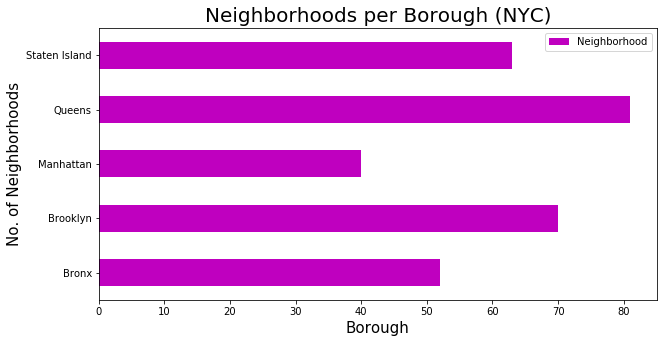

In [58]:
clr = "m"
ny_data.groupby('Borough')['Neighborhood'].count().plot.barh(figsize=(10,5), color=clr)
plt.title('Neighborhoods per Borough (NYC)', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. of Neighborhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

In [7]:
# queens has most neighborhoods
# prepare neighborhood list that contains japanese restaurants
column_names=['Borough', 'Neighborhood', 'ID','Name']
japanese_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in ny_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    japanese_restaurants=venues[venues['Category']=='Japanese Restaurant']   
    print('(',count,'/',len(ny_data),')','Japanese Restaurants in '+Neighborhood+', '+Borough+':'+str(len(japanese_restaurants)))
    print(row)
    for resturant_detail in japanese_restaurants.values.tolist():
        id, name , category=resturant_detail
        japanese_rest_ny = japanese_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Japanese Restaurants in Wakefield, Bronx:0
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 2 / 306 ) Japanese Restaurants in Co-op City, Bronx:0
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 3 / 306 ) Japanese Restaurants in Eastchester, Bronx:0
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 4 / 306 ) Japanese Restaurants in Fieldston, Bronx:0
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 5 / 306 ) Japanese Restaurants in Riverdale, Bronx:0
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 6 / 306 ) Japanese Restaurants in Kingsbridge, Bronx:0
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 7 / 306 ) Japanese Restaurants in Marble Hill, Manhattan:0
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 8 / 306 ) Japanese Restaurants in Woodlawn, Bronx:0
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 9 / 306 ) Japanese Restaurants in Norwood, B

In [8]:
#japanese_rest_ny.to_csv('japanese_rest_ny_tocsv1.csv') # Save the information so far to a .csv file due to limited calls on FourSquare
japanese_rest_ny.to_csv('japanese_rest_ny_tocsv1.csv')

In [9]:
japanese_ny = pd.read_csv('japanese_rest_ny_tocsv1.csv')
japanese_rest_ny.tail()

,Borough,Neighborhood,ID,Name
65,Manhattan,Flatiron,581a10901df6b32e66ec3a07,Sugarfish
66,Manhattan,Flatiron,55805bb5498e8356d675aa22,Yakiniku Futago
67,Queens,Sunnyside Gardens,4ba2a9cbf964a520d00d38e3,Oki Japanese Restaurant
68,Brooklyn,Fulton Ferry,5cf1562460255e002c5e683c,Bessou
69,Brooklyn,Dumbo,5cf1562460255e002c5e683c,Bessou


In [10]:
japanese_rest_ny.shape  

(70, 4)

We got 70 Japanese Restaurants across the New York City.

 Wee can see below that although Manhattan had the least number of neighborhoods, it does have the highest number of Japanese restaurants. Additionally, we see how many restaurants the top 6 neighborhoods have. The neighborhood of Murray Hill has the highest number of Japanese restaurants in all of NYC and is actually located in the boroughs of Manhattan and Queens.

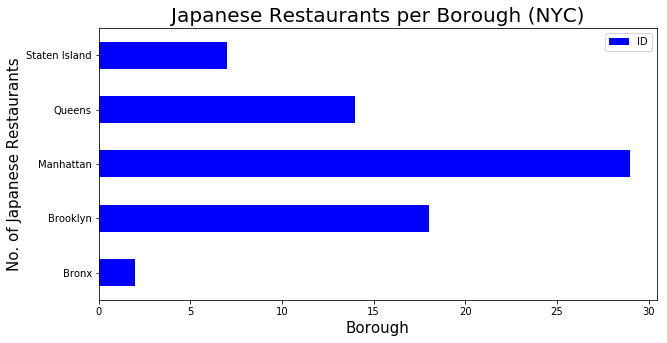

In [61]:
japanese_rest_ny.groupby('Borough')['ID'].count().plot.barh(figsize=(10,5), color='b')
plt.title('Japanese Restaurants per Borough (NYC)', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. of Japanese Restaurants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

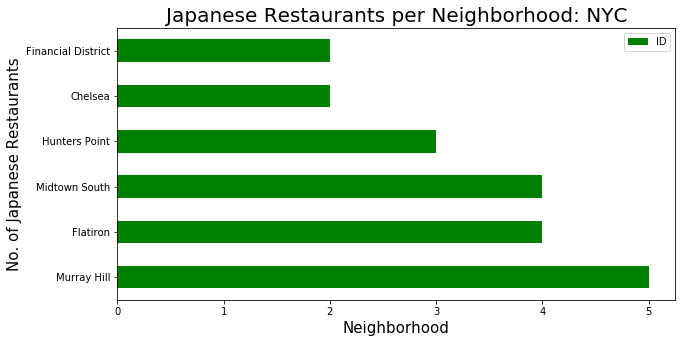

In [62]:
NOofNeigh = 6 # top number for graphing all the same past 6
japanese_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(NOofNeigh).plot.barh(figsize=(10,5), color='g')
plt.title('Japanese Restaurants per Neighborhood: NYC', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('No. of Japanese Restaurants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

In [14]:
japanese_rest_ny[japanese_rest_ny['Neighborhood']=='Murray Hill']      

,Borough,Neighborhood,ID,Name
21,Manhattan,Murray Hill,4a99b4f4f964a520f62f20e3,Kajitsu
22,Manhattan,Murray Hill,559cbaa6498eaa4e8d884811,Tempura Matsui
23,Manhattan,Murray Hill,591caee89deb7d0f69be77a2,Omusubi Gonbei
24,Manhattan,Murray Hill,540dc46d498e86f0e5059dd2,Zuma New York
40,Queens,Murray Hill,4bc8eee83740b713fcbe5d65,Northern Sushi


As we see, the Murray Hill in Manhattan has the highest number of Japanese Restaurants with a total count of 5.

Now we will get the ranking of each restaurant for further analysis.

In [15]:

column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
japanese_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1
for row in japanese_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(japanese_rest_ny),')','processed')
    japanese_rest_stats_ny = japanese_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

{'meta': {'code': 200, 'requestId': '5f4eed226e45df24328e88c2'}, 'response': {'venue': {'id': '59431675b1ec1308509ffff7', 'name': 'Ohana Hibachi Steak & Seafood', 'contact': {}, 'location': {'address': '3604 East Tremont Avenue', 'lat': 40.828645, 'lng': -73.824702, 'labeledLatLngs': [{'label': 'display', 'lat': 40.828645, 'lng': -73.824702}], 'postalCode': '10465', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['3604 East Tremont Avenue', 'New York, NY 10465', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/ohana-hibachi-steak--seafood/59431675b1ec1308509ffff7', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 1}, 'price': {'tier': 2, 'message': 'Moderate', 'currency': '$'}, 'li

In [16]:
japanese_rest_stats_ny.tail()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
65,Manhattan,Flatiron,581a10901df6b32e66ec3a07,Sugarfish,454,8.9,102
66,Manhattan,Flatiron,55805bb5498e8356d675aa22,Yakiniku Futago,157,8.4,26
67,Queens,Sunnyside Gardens,4ba2a9cbf964a520d00d38e3,Oki Japanese Restaurant,11,7.4,5
68,Brooklyn,Fulton Ferry,5cf1562460255e002c5e683c,Bessou,11,8.2,1
69,Brooklyn,Dumbo,5cf1562460255e002c5e683c,Bessou,11,8.2,1


In [17]:
japanese_rest_stats_ny.to_csv('japanese_rest_stats_ny_csv.csv') # As I move through this project I continue to save data to a .csv file

In [18]:
japanese_rest_stats_ny.shape

(70, 7)

We got statistics for all Japanese Restaurants in New York city.

Let's check what values we have in our DataFrame

In [19]:
japanese_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
Borough         70 non-null object
Neighborhood    70 non-null object
ID              70 non-null object
Name            70 non-null object
Likes           70 non-null object
Rating          70 non-null object
Tips            70 non-null object
dtypes: object(7)
memory usage: 3.9+ KB


 We would need to convert Tips and Likes into float for further analysis

In [25]:
japanese_rest_stats_ny['Likes'] = japanese_rest_stats_ny['Likes'].astype('float64')
japanese_rest_stats_ny['Tips'] = japanese_rest_stats_ny['Tips'].astype('float64')
japanese_rest_stats_ny['Rating'] = japanese_rest_stats_ny['Rating'].astype('float64')
japanese_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
Borough         70 non-null object
Neighborhood    70 non-null object
ID              70 non-null object
Name            70 non-null object
Likes           70 non-null float64
Rating          70 non-null float64
Tips            70 non-null float64
dtypes: float64(3), object(4)
memory usage: 3.9+ KB


### Let's continue Analysis after Data Correction

In [26]:
japanese_rest_stats_ny.describe()

,Likes,Rating,Tips
count,70.000000,70.00000,70.000000
mean,154.542857,7.62000,45.785714
std,253.040392,2.05952,71.430293
min,0.000000,0.00000,0.000000
25%,11.000000,7.50000,5.000000
50%,47.000000,8.20000,13.500000
75%,189.000000,8.70000,54.500000
max,1221.000000,9.20000,353.000000


In [27]:
# Resturant with maximum Likes
japanese_rest_stats_ny.iloc[japanese_rest_stats_ny['Likes'].idxmax()]

Borough                        Manhattan
Neighborhood                    Flatiron
ID              4f7b61f6e4b07aaa5d524842
Name                 OOTOYA 大戸屋 (OOTOYA)
Likes                               1221
Rating                               8.9
Tips                                 274
Name: 64, dtype: object

In [28]:
# Resturant with maximum Ratings
japanese_rest_stats_ny.iloc[japanese_rest_stats_ny['Rating'].idxmax()]

Borough                        Manhattan
Neighborhood                East Village
ID              510c85e7e4b0056826b88297
Name                                Kura
Likes                                213
Rating                               9.2
Tips                                  62
Name: 27, dtype: object

In [29]:
# Resturant with maximum Tips
japanese_rest_stats_ny.iloc[japanese_rest_stats_ny['Tips'].idxmax()]

Borough                        Manhattan
Neighborhood                     Chelsea
ID              454f7cc4f964a520dc3c1fe3
Name                            Morimoto
Likes                                792
Rating                               8.7
Tips                                 353
Name: 26, dtype: object

### Identify and visualize Neighborhood with the maximum average rating of restaurants...
The top neighborhoods with the highest average ratings of Japanese restaurants:

In [30]:
ny_neighborhood_stats=japanese_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
12,East Village,9.20
8,Cobble Hill,9.10
37,Park Slope,9.00
24,Hunters Point,9.00
36,North Side,8.90
43,Soho,8.90
1,Boerum Hill,8.90
15,Flatiron,8.85
16,Fort Greene,8.80
28,Lindenwood,8.80


These are the average ratings of Japanese Restaurants for each Borough:

In [31]:
ny_borough_stats=japanese_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
2,Manhattan,8.437931
1,Brooklyn,8.183333
3,Queens,7.164286
4,Staten Island,5.871429
0,Bronx,0.000000


### Results Visualization

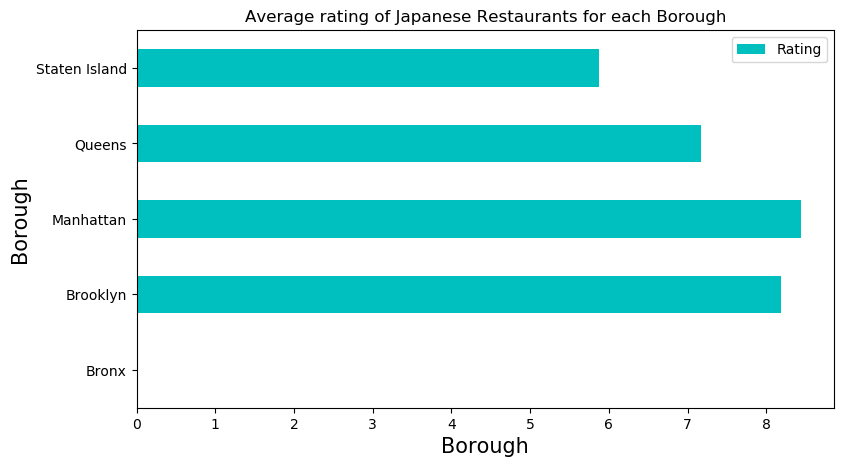

In [65]:
plt.figure(figsize=(9,5), dpi = 100)
plt.title('Average rating of Japanese Restaurants for each Borough')
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Average Rating', fontsize=15)
japanese_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='barh', color='c')
plt.legend()
plt.show()

We will consider all the neighborhoods with average rating greater or equal 8.0 to visualize on a map

In [33]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=8.0]
ny_neighborhood_stats

,Neighborhood,Average Rating
0,Bedford Stuyvesant,8.10
1,Boerum Hill,8.90
2,Brooklyn Heights,8.10
6,Chelsea,8.70
8,Cobble Hill,9.10
10,Downtown,8.60
11,Dumbo,8.20
12,East Village,9.20
14,Financial District,8.10
15,Flatiron,8.85


In [34]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,ny_data, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Brooklyn,Bedford Stuyvesant,40.687232,-73.941785,8.10
1,Brooklyn,Boerum Hill,40.685683,-73.983748,8.90
2,Brooklyn,Brooklyn Heights,40.695864,-73.993782,8.10
3,Manhattan,Chelsea,40.744035,-74.003116,8.70
4,Staten Island,Chelsea,40.594726,-74.189560,8.70
5,Brooklyn,Cobble Hill,40.687920,-73.998561,9.10
6,Brooklyn,Downtown,40.690844,-73.983463,8.60
7,Brooklyn,Dumbo,40.703176,-73.988753,8.20
8,Manhattan,East Village,40.727847,-73.982226,9.20
9,Manhattan,Financial District,40.707107,-74.010665,8.10


Now we will show this data on a map:

In [35]:
# create map and display it
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
# instantiate a feature group for the ratings in the dataframe
rating = folium.map.FeatureGroup()

# loop through the ratings and add each to the neighborhood feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    rating.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [36]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add ratings to map
ny_map.add_child(rating)

## Results and Conclusion <a name="results"></a>

Manhattan and Brooklyn have the best rated Japanese restaurants on average. Staten Island and The Bronx have the least amount of Japanese restaurants per borough. However, of note, Murray Hill in Manhattan has the highest number of Japanese Restaurants in all of NY. Despite Manhattan having the least number of neighborhoods in all five boroughs, it has the most number of Japanese restaurants. Based on the above information, I would state that Manhattan and Brooklyn are the best locations for Japanese cuisine in NYC. To have the best shot of success, I would open a Japanese restaurant in Brooklyn. Brooklyn has multiple neighborhoods with average ratings exceeding 8.0 on a scale of 1.0 to 10.0 and has less amount of Japanese restaurants than Manhattan, making competition easier. Also we should keep in mind, that real estate prices in Brooklyn are much cheaper than in Manhattan. Finally, I would go to OOTOYA in Manhattan for the best Japanese food based on 1213 likes. As a final note, all of the above analysis is depended on the accuracy of Four Square data. A more comprehensive analysis and future work would need to incorporate data from other external databases.